# IPL Winner Prediction(Training model)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\KIIT\Documents\LGM-Soc contributions\IPL Winner Prediction\Dataset/dataset.xlsx')

### Loading dataset

In [3]:
df

,Match ID,Match Date,Neutrality,First Team,Second Team,Winner of Toss,Toss Decision,Match Winner,Win Basis,Margin of Win,Eliminator ?,Type of Elimination
0,1201,2012-04-17,0,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,bat,Royal Challengers Bangalore,wickets,6.0,N,NaN
1,1202,2019-04-01,0,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,runs,14.0,N,NaN
2,1203,2019-04-13,0,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N,NaN
3,1204,2010-04-04,0,Delhi Daredevils,Royal Challengers Bangalore,Delhi Daredevils,bat,Delhi Daredevils,runs,37.0,N,NaN
4,1205,2017-05-21,0,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,Mumbai Indians,runs,1.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
811,2012,2012-04-15,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,runs,59.0,N,NaN
812,2013,2017-05-07,0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,N,NaN
813,2014,2015-04-17,0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Chennai Super Kings,wickets,6.0,N,NaN
814,2015,2015-04-08,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,7.0,N,NaN


In [4]:
for teams in df['First Team'].unique():
    print(teams)

Royal Challengers Bangalore
Kings XI Punjab
Mumbai Indians
Delhi Daredevils
Chennai Super Kings
Kolkata Knight Riders
Sunrisers Hyderabad
Rajasthan Royals
Delhi Capitals
Gujarat Lions
Rising Pune Supergiants
Pune Warriors
Deccan Chargers
Rising Pune Supergiant
Kochi Tuskers Kerala


### Replacing with proper team names

In [5]:
df.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace=True)
df.replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
df.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match ID             816 non-null    int64  
 1   Match Date           816 non-null    object 
 2   Neutrality           816 non-null    int64  
 3   First Team           816 non-null    object 
 4   Second Team          816 non-null    object 
 5   Winner of Toss       816 non-null    object 
 6   Toss Decision        816 non-null    object 
 7   Match Winner         812 non-null    object 
 8   Win Basis            812 non-null    object 
 9   Margin of Win        799 non-null    float64
 10  Eliminator ?         812 non-null    object 
 11  Type of Elimination  19 non-null     object 
dtypes: float64(1), int64(2), object(9)
memory usage: 76.6+ KB


In [7]:
df.dtypes

Match ID                 int64
Match Date              object
Neutrality               int64
First Team              object
Second Team             object
Winner of Toss          object
Toss Decision           object
Match Winner            object
Win Basis               object
Margin of Win          float64
Eliminator ?            object
Type of Elimination     object
dtype: object

### Renaming the Eliminator Column

In [8]:
df = df.rename(columns = {"Eliminator ?":"Eliminator"})

### Filling null values wirh median value

In [9]:
df = df.fillna(df.median())

In [10]:
df.drop(['Type of Elimination'],axis=1,inplace=True)
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Match ID          0
Match Date        0
Neutrality        0
First Team        0
Second Team       0
Winner of Toss    0
Toss Decision     0
Match Winner      0
Win Basis         0
Margin of Win     0
Eliminator        0
dtype: int64

In [12]:
df.head()

,Match ID,Match Date,Neutrality,First Team,Second Team,Winner of Toss,Toss Decision,Match Winner,Win Basis,Margin of Win,Eliminator
0,1201,2012-04-17,0,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,bat,Royal Challengers Bangalore,wickets,6.0,N
1,1202,2019-04-01,0,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,runs,14.0,N
2,1203,2019-04-13,0,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N
3,1204,2010-04-04,0,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,Delhi Capitals,runs,37.0,N
4,1205,2017-05-21,0,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,1.0,N


### Changing into Datetime format

In [13]:
def change_into_datetime(col):
    df[col] = pd.to_datetime(df[col])

In [14]:
for i in ['Match Date']:
    change_into_datetime(i)

In [15]:
df['Match_date'] = df['Match Date'].dt.day
df['Match_month'] = df['Match Date'].dt.month
df['Match_season'] = df['Match Date'].dt.year

In [16]:
df

,Match ID,Match Date,Neutrality,First Team,Second Team,Winner of Toss,Toss Decision,Match Winner,Win Basis,Margin of Win,Eliminator,Match_date,Match_month,Match_season
0,1201,2012-04-17,0,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,bat,Royal Challengers Bangalore,wickets,6.0,N,17,4,2012
1,1202,2019-04-01,0,Kings XI Punjab,Delhi Capitals,Delhi Capitals,field,Kings XI Punjab,runs,14.0,N,1,4,2019
2,1203,2019-04-13,0,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N,13,4,2019
3,1204,2010-04-04,0,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,Delhi Capitals,runs,37.0,N,4,4,2010
4,1205,2017-05-21,0,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,1.0,N,21,5,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,2012,2012-04-15,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,runs,59.0,N,15,4,2012
812,2013,2017-05-07,0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,6.0,N,7,5,2017
813,2014,2015-04-17,0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Chennai Super Kings,wickets,6.0,N,17,4,2015
814,2015,2015-04-08,0,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,7.0,N,8,4,2015


### Replacing team names with codes

In [17]:
df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Delhi Capitals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)


df.head(5)

,Match ID,Match Date,Neutrality,First Team,Second Team,Winner of Toss,Toss Decision,Match Winner,Win Basis,Margin of Win,Eliminator,Match_date,Match_month,Match_season
0,1201,2012-04-17,0,RCB,PW,PW,bat,RCB,wickets,6.0,N,17,4,2012
1,1202,2019-04-01,0,KXIP,DD,DD,field,KXIP,runs,14.0,N,1,4,2019
2,1203,2019-04-13,0,MI,RR,RR,field,RR,wickets,4.0,N,13,4,2019
3,1204,2010-04-04,0,DD,RCB,DD,bat,DD,runs,37.0,N,4,4,2010
4,1205,2017-05-21,0,MI,RPS,MI,bat,MI,runs,1.0,N,21,5,2017


### Encoding the Teams in specific numeric codes

In [18]:
encoding = {'First Team': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'Second Team': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'Winner of Toss': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'Match Winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
df.replace(encoding, inplace=True)
df.head(5)

,Match ID,Match Date,Neutrality,First Team,Second Team,Winner of Toss,Toss Decision,Match Winner,Win Basis,Margin of Win,Eliminator,Match_date,Match_month,Match_season
0,1201,2012-04-17,0,3,13,13,bat,3,wickets,6.0,N,17,4,2012
1,1202,2019-04-01,0,9,7,7,field,9,runs,14.0,N,1,4,2019
2,1203,2019-04-13,0,1,6,6,field,6,wickets,4.0,N,13,4,2019
3,1204,2010-04-04,0,7,3,7,bat,7,runs,37.0,N,4,4,2010
4,1205,2017-05-21,0,1,11,1,bat,1,runs,1.0,N,21,5,2017


### Label encoding the categorical columns having ordinal data

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [20]:
df["Toss Decision"] = le.fit_transform(df["Toss Decision"])
df["Eliminator"] = le.fit_transform(df["Eliminator"])
df["Match_season"] = le.fit_transform(df["Match_season"])

In [21]:
df.dtypes

Match ID                   int64
Match Date        datetime64[ns]
Neutrality                 int64
First Team                 int64
Second Team                int64
Winner of Toss             int64
Toss Decision              int32
Match Winner               int64
Win Basis                 object
Margin of Win            float64
Eliminator                 int32
Match_date                 int64
Match_month                int64
Match_season               int64
dtype: object

### Perfroming One Hot Encoding on categorical columns having nominal data

In [22]:
win_basis = pd.get_dummies(df['Win Basis'])

In [23]:
win_basis['Win Basis_runs'] = win_basis['runs']
win_basis['Win Basis_tie'] = win_basis['tie']
win_basis['Win Basis_wickets'] = win_basis['wickets']

win_basis.drop(['runs','tie','wickets'], axis=1,inplace=True)

In [24]:
win_basis

,Win Basis_runs,Win Basis_tie,Win Basis_wickets
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
811,1,0,0
812,0,0,1
813,0,0,1
814,0,0,1


### Concatinating the one hot encoded daatset with the training dataset

In [25]:
df = pd.concat([df,win_basis], axis=1)

In [26]:
df

,Match ID,Match Date,Neutrality,First Team,Second Team,Winner of Toss,Toss Decision,Match Winner,Win Basis,Margin of Win,Eliminator,Match_date,Match_month,Match_season,Win Basis_runs,Win Basis_tie,Win Basis_wickets
0,1201,2012-04-17,0,3,13,13,0,3,wickets,6.0,0,17,4,4,0,0,1
1,1202,2019-04-01,0,9,7,7,1,9,runs,14.0,0,1,4,11,1,0,0
2,1203,2019-04-13,0,1,6,6,1,6,wickets,4.0,0,13,4,11,0,0,1
3,1204,2010-04-04,0,7,3,7,0,7,runs,37.0,0,4,4,2,1,0,0
4,1205,2017-05-21,0,1,11,1,0,1,runs,1.0,0,21,5,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,2012,2012-04-15,0,3,6,6,0,6,runs,59.0,0,15,4,4,1,0,0
812,2013,2017-05-07,0,3,2,2,1,2,wickets,6.0,0,7,5,9,0,0,1
813,2014,2015-04-17,0,1,5,1,0,5,wickets,6.0,0,17,4,7,0,0,1
814,2015,2015-04-08,0,2,1,2,1,2,wickets,7.0,0,8,4,7,0,0,1


### Dropping the unnecessary columns 

In [27]:
df.drop(['Match ID','Match Date','Win Basis','Match_date','Match_month'],axis=1,inplace=True)

In [28]:
df

,Neutrality,First Team,Second Team,Winner of Toss,Toss Decision,Match Winner,Margin of Win,Eliminator,Match_season,Win Basis_runs,Win Basis_tie,Win Basis_wickets
0,0,3,13,13,0,3,6.0,0,4,0,0,1
1,0,9,7,7,1,9,14.0,0,11,1,0,0
2,0,1,6,6,1,6,4.0,0,11,0,0,1
3,0,7,3,7,0,7,37.0,0,2,1,0,0
4,0,1,11,1,0,1,1.0,0,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
811,0,3,6,6,0,6,59.0,0,4,1,0,0
812,0,3,2,2,1,2,6.0,0,9,0,0,1
813,0,1,5,1,0,5,6.0,0,7,0,0,1
814,0,2,1,2,1,2,7.0,0,7,0,0,1


In [29]:
df.shape

(812, 12)

In [30]:
X = df.drop('Match Winner', axis=1)
X.head()

,Neutrality,First Team,Second Team,Winner of Toss,Toss Decision,Margin of Win,Eliminator,Match_season,Win Basis_runs,Win Basis_tie,Win Basis_wickets
0,0,3,13,13,0,6.0,0,4,0,0,1
1,0,9,7,7,1,14.0,0,11,1,0,0
2,0,1,6,6,1,4.0,0,11,0,0,1
3,0,7,3,7,0,37.0,0,2,1,0,0
4,0,1,11,1,0,1.0,0,9,1,0,0


### Performing Feature Scaling using Standard Scaler

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

X

array([[-0.32366944, -0.81699   ,  2.11795443, ..., -0.90138782,
        -0.12755523,  0.93094934],
       [-0.32366944,  0.96314206,  0.35528378, ...,  1.10940039,
        -0.12755523, -1.07417231],
       [-0.32366944, -1.41036736,  0.06150534, ..., -0.90138782,
        -0.12755523,  0.93094934],
       ...,
       [-0.32366944, -1.41036736, -0.2322731 , ..., -0.90138782,
        -0.12755523,  0.93094934],
       [-0.32366944, -1.11367868, -1.40738687, ..., -0.90138782,
        -0.12755523,  0.93094934],
       [-0.32366944,  0.07307603, -1.40738687, ...,  1.10940039,
        -0.12755523, -1.07417231]])

In [32]:
X.shape

(812, 11)

In [33]:
y = df['Match Winner']
y.head()

0    3
1    9
2    6
3    7
4    1
Name: Match Winner, dtype: int64

In [34]:
y.shape

(812,)

### Splitting the Data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
from sklearn.metrics import accuracy_score as score

## Logistic Regression

In [38]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()

lg_model.fit(X_train, y_train)

LogisticRegression()

In [39]:
preds1 = lg_model.predict(X_test)

In [40]:
preds1

array([ 2, 10,  1,  9,  7,  3,  5,  3, 10,  2, 10, 10,  1,  1,  1,  1,  7,
        9,  5, 10, 10,  3, 10,  9,  9, 10,  1, 10,  2, 10,  1,  1,  1, 10,
        5,  1,  7, 10,  7,  1,  3,  7,  7,  2,  1,  6,  7,  3, 10, 10, 10,
        1,  6, 10,  5,  1, 10,  1,  3,  5,  7,  7,  7, 10, 10, 10,  1,  1,
        1,  5, 10,  1,  1,  1,  1,  7,  3, 10,  1, 10,  1,  3,  5,  5,  3,
        1, 10,  2,  1,  1,  1,  6, 10,  9, 10,  1,  1,  1,  1,  1,  2,  6,
        1,  1,  5,  3,  3,  2,  1,  5,  9,  5,  9,  9, 10, 10,  6,  1, 10,
        1, 10,  1, 10,  1,  3, 10,  1,  3, 10, 13,  3,  1,  6,  1,  2,  7,
        1,  6,  2,  9,  7,  3,  6, 10,  9,  1,  1,  9,  5, 10,  1,  7,  5,
        1,  5,  5,  1,  7,  5,  7,  9,  1,  1, 10,  1,  1,  5,  3,  1,  2,
        1,  5,  1,  1,  3, 10,  1,  3,  3,  9, 10,  6,  1, 10, 10, 10, 10,
        3,  1,  5,  1,  1,  3,  1,  6,  5,  3, 10,  1,  3, 10,  7,  1,  3,
        6,  7,  5,  2,  1, 10, 10, 10,  1,  1,  1,  3,  1, 13, 10,  3,  2,
       10,  7,  9,  9,  9

In [41]:
print("Train Accuracy:", lg_model.score(X_train, y_train))
print("Test Accuracy:" , lg_model.score(X_test, y_test))

Train Accuracy: 0.29401408450704225
Test Accuracy: 0.2581967213114754


In [42]:
from sklearn.metrics import classification_report
report = classification_report(digits = 3, y_true = y_test, y_pred = preds1)
print(report)

              precision    recall  f1-score   support

           1      0.303     0.697     0.422        33
           2      0.167     0.067     0.095        30
           3      0.185     0.208     0.196        24
           5      0.318     0.194     0.241        36
           6      0.333     0.167     0.222        24
           7      0.095     0.074     0.083        27
           8      0.000     0.000     0.000         7
           9      0.222     0.138     0.170        29
          10      0.278     0.577     0.375        26
          11      0.000     0.000     0.000         3
          12      0.000     0.000     0.000         3
          13      0.500     0.500     0.500         2

    accuracy                          0.258       244
   macro avg      0.200     0.219     0.192       244
weighted avg      0.230     0.258     0.219       244



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


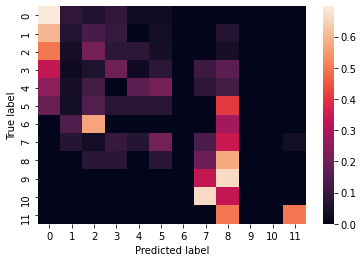

In [43]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, preds1)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
preds2 = rf_clf.predict(X_test)

In [46]:
preds2

array([ 3,  5,  1,  6,  2,  5,  1,  7,  6,  6, 10,  7,  1,  2,  6,  1,  6,
       13,  7,  8,  9,  9,  6,  9,  2,  7,  1,  7,  2,  7,  1,  6,  7,  9,
        5,  1,  7,  9,  7,  1,  7,  5,  7,  1,  1,  9,  6,  2, 13, 10,  7,
        3,  6, 10,  5,  1, 10,  5,  1,  2,  5,  6,  8, 10, 10,  9,  2,  3,
        1,  1,  6,  3,  3,  5,  9,  5,  2, 11,  1,  2,  5,  5,  2,  1,  6,
        5, 10,  1,  1,  5,  2,  7,  9,  5,  9,  1,  1,  5,  1,  1,  5,  6,
        2,  1, 10,  3,  3,  2,  7,  2,  9,  1,  5,  3,  9, 10,  7,  1,  7,
        5,  9,  1,  6,  6,  3,  5,  1,  5, 10,  9,  7,  2,  1,  2,  1,  9,
        1,  3,  1, 10,  5,  6,  6, 10, 10,  1,  5,  2,  5, 10,  1,  5,  6,
        6,  3,  3,  2, 10,  1,  7,  9,  1,  1,  7,  3,  5,  5,  3,  1,  1,
        1,  5,  2,  5,  2,  9,  2, 10,  6, 10, 10,  3,  1,  9, 10, 10, 10,
        2,  2,  2,  1,  1, 10,  1,  6,  5,  1, 10,  2,  2,  9,  1,  1,  9,
        5,  5,  5,  1,  1,  7, 10,  9,  7,  2,  5,  7,  5, 13,  6,  1,  9,
        9,  3,  6,  9,  5

In [47]:
print("Train Accuracy:", rf_clf.score(X_train, y_train))
print("Test Accuracy:" , rf_clf.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.6639344262295082


In [48]:
from sklearn.metrics import classification_report
report = classification_report(digits = 3, y_true = y_test, y_pred = preds2)
print(report)

              precision    recall  f1-score   support

           1      0.623     1.000     0.767        33
           2      0.786     0.733     0.759        30
           3      0.875     0.583     0.700        24
           5      0.676     0.694     0.685        36
           6      0.583     0.583     0.583        24
           7      0.593     0.593     0.593        27
           8      0.500     0.143     0.222         7
           9      0.556     0.517     0.536        29
          10      0.731     0.731     0.731        26
          11      1.000     0.333     0.500         3
          12      0.000     0.000     0.000         3
          13      0.667     1.000     0.800         2

    accuracy                          0.664       244
   macro avg      0.632     0.576     0.573       244
weighted avg      0.666     0.664     0.651       244



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


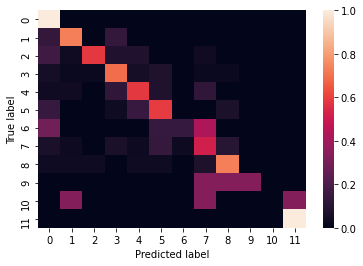

In [49]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, preds2)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Using XGBoost classifier

In [50]:
import xgboost as xgb

In [51]:
xgb_clf = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3)
xgb_clf.fit(X_train, y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:38:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
preds3 = xgb_clf.predict(X_test)

In [53]:
preds3

array([ 3, 13,  1,  6,  2,  5,  1,  8,  6,  3, 10,  6,  1,  2,  6,  1,  7,
        2,  9,  8,  9,  8,  5, 10,  2,  7,  1,  7,  2,  7,  1,  6,  2,  9,
        5,  1,  6,  3,  7,  1,  5,  5,  7,  8,  1,  9,  6,  9, 13, 10,  7,
        3,  6, 10,  5,  1, 10,  5,  1,  2,  5,  7,  3, 10, 10,  9,  2,  3,
        5,  1,  7,  3,  5,  3,  3,  5,  2, 11,  1, 13,  2,  5, 10,  1,  6,
        6,  8,  1,  1,  5,  2,  7,  9,  5,  9,  2,  1,  5,  1,  1,  5,  6,
        2,  1, 10, 10,  3,  2,  3,  2, 11,  1,  5,  3,  9,  6,  7,  1,  7,
        6, 11,  1, 13,  6,  3,  9,  1,  5, 10,  9,  7,  2,  1,  2,  1,  9,
        1,  3,  1, 10,  6,  6,  6, 10,  9,  1,  5,  2,  5, 10,  1,  7,  5,
        1,  3,  3,  2, 10,  3,  7,  9,  1,  1,  7,  3,  6,  5,  3,  6,  9,
        2,  5,  2,  5,  9,  9,  2, 10,  7, 10, 10,  3,  1,  9, 10, 10, 10,
        2,  2, 11,  1,  1,  3,  1,  6,  5,  1, 10,  2,  7,  9,  9,  1,  3,
        5,  9,  5,  1,  1,  9, 10,  9,  2,  2,  2,  7,  5, 13,  6,  1,  9,
       12,  3,  6,  9,  5

In [54]:
print("Train Accuracy:", xgb_clf.score(X_train, y_train))
print("Test Accuracy:" , xgb_clf.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.6270491803278688


In [55]:
from sklearn.metrics import classification_report
report = classification_report(digits = 3, y_true = y_test, y_pred = preds3)
print(report)

              precision    recall  f1-score   support

           1      0.596     0.848     0.700        33
           2      0.548     0.567     0.557        30
           3      0.565     0.542     0.553        24
           5      0.733     0.611     0.667        36
           6      0.542     0.542     0.542        24
           7      0.700     0.519     0.596        27
           8      0.800     0.571     0.667         7
           9      0.667     0.690     0.678        29
          10      0.708     0.654     0.680        26
          11      0.500     0.667     0.571         3
          12      1.000     0.333     0.500         3
          13      0.400     1.000     0.571         2

    accuracy                          0.627       244
   macro avg      0.647     0.629     0.607       244
weighted avg      0.642     0.627     0.625       244



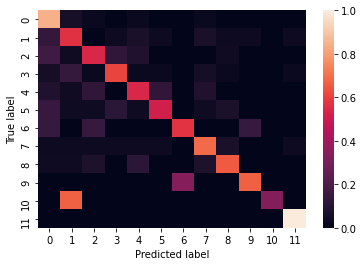

In [56]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, preds3)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Using GaussianNB

In [57]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

GaussianNB()

In [58]:
preds4 = nb_model.predict(X_test)

In [59]:
preds4

array([ 8, 13,  5, 10, 10, 13, 13, 11, 13, 13,  8, 10,  5, 11,  5, 13,  8,
       13,  5,  8, 13, 11, 13,  5, 11, 10, 13, 11, 11, 10, 13,  8,  5,  8,
        5, 13,  7, 11,  8, 11, 13, 13,  8,  8,  5, 13, 13, 11, 13, 10,  8,
        5,  5, 11, 13, 11,  8, 13, 10, 13,  7, 13,  8, 13, 10,  8, 13, 11,
       13, 13, 13, 11, 13,  5, 11,  5, 11, 11, 13, 13,  5,  5, 10, 13,  5,
        5,  8, 13, 11,  5,  5,  5, 13, 11, 13,  5,  5,  5, 13,  5,  8, 13,
        5, 11, 10, 11,  5, 11, 10, 10, 11,  5,  5,  5, 10, 10, 13, 13, 11,
       13,  8,  5, 13,  5,  5, 10, 13, 13, 11, 13,  5, 11, 13,  5, 11, 13,
       13,  8, 11, 13, 10,  5, 13, 11, 11,  5, 13, 13,  5, 10, 13, 13,  5,
       11, 13,  5, 11,  7,  5,  5, 10, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        5, 13,  5,  5, 13, 11,  5, 13,  5,  5,  8, 10,  5, 10,  8, 10,  8,
        7, 11, 11, 11, 11, 13,  5, 13,  5, 11, 10, 11,  5,  8,  5, 11, 11,
       10,  5, 11, 11, 11,  8, 13, 13,  5,  5, 11, 13, 13, 13, 10, 11, 11,
       12, 13,  5, 13,  5

In [60]:
print("Train Accuracy:", nb_model.score(X_train, y_train))
print("Test Accuracy:" , nb_model.score(X_test, y_test))

Train Accuracy: 0.13204225352112675
Test Accuracy: 0.10245901639344263


In [61]:
from sklearn.metrics import classification_report
report = classification_report(digits = 3, y_true = y_test, y_pred = preds4)
print(report)

              precision    recall  f1-score   support

           1      0.000     0.000     0.000        33
           2      0.000     0.000     0.000        30
           3      0.000     0.000     0.000        24
           5      0.197     0.333     0.247        36
           6      0.000     0.000     0.000        24
           7      0.000     0.000     0.000        27
           8      0.130     0.429     0.200         7
           9      0.000     0.000     0.000        29
          10      0.192     0.192     0.192        26
          11      0.043     0.667     0.080         3
          12      1.000     0.333     0.500         3
          13      0.024     1.000     0.048         2

    accuracy                          0.102       244
   macro avg      0.132     0.246     0.106       244
weighted avg      0.066     0.102     0.070       244



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


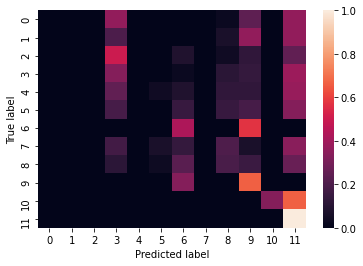

In [62]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, preds4)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Using KNNs

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
preds5 = knn_model.predict(X_test)

In [67]:
preds5

array([ 3,  3,  1,  3,  3,  5,  2,  7, 10,  5, 10,  5,  2,  2,  1,  3,  6,
       13, 10,  7,  9,  7,  1,  9,  9,  5,  3,  6,  1,  7,  3,  6,  6, 10,
        3,  3,  2,  2,  7,  1,  6,  6,  7,  8,  1,  9,  7,  1, 10,  9,  6,
        1,  7,  3,  5,  2, 11,  5,  1,  2,  2,  6, 10,  5,  7,  8,  1,  1,
        6, 10,  3,  1,  1,  5,  2,  5,  2, 11,  2,  1,  6,  3,  2,  9,  3,
        5,  7,  2,  6,  5,  1,  7,  5,  5,  9,  2,  1,  3,  1,  1,  5,  5,
        1,  1,  9,  2,  3,  1,  6,  6,  9,  1,  3,  5,  9,  7,  6,  1,  6,
        1,  6,  3, 13,  1,  3,  3,  5,  3, 10,  6,  7,  2,  1,  1,  1,  7,
        3,  2,  5,  9,  5,  6,  6,  9, 10,  1,  6, 10,  7,  5,  1,  6,  6,
        6,  1,  3,  1,  1,  1,  2,  7,  6,  1, 10,  3,  1,  5,  3,  2, 10,
        5,  5,  1,  5,  2,  9,  1,  9,  6,  9, 11,  3,  2,  2, 10,  5,  7,
        3,  2,  1,  1,  6,  9,  1,  6,  5,  7,  5,  2,  3,  9,  5,  1,  7,
        3,  7,  5,  2,  1,  7,  7,  9,  1,  1,  6,  5,  1,  7,  5,  3,  9,
        9,  2,  1,  9,  3

In [68]:
print("Train Accuracy:", knn_model.score(X_train, y_train))
print("Test Accuracy:" , knn_model.score(X_test, y_test))

Train Accuracy: 0.6584507042253521
Test Accuracy: 0.3319672131147541


In [69]:
from sklearn.metrics import classification_report
report = classification_report(digits = 3, y_true = y_test, y_pred = preds5)
print(report)

              precision    recall  f1-score   support

           1      0.377     0.606     0.465        33
           2      0.346     0.300     0.321        30
           3      0.290     0.375     0.327        24
           5      0.412     0.389     0.400        36
           6      0.250     0.292     0.269        24
           7      0.179     0.185     0.182        27
           8      0.500     0.143     0.222         7
           9      0.409     0.310     0.353        29
          10      0.400     0.231     0.293        26
          11      0.333     0.333     0.333         3
          12      0.000     0.000     0.000         3
          13      0.000     0.000     0.000         2

    accuracy                          0.332       244
   macro avg      0.291     0.264     0.264       244
weighted avg      0.337     0.332     0.324       244



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


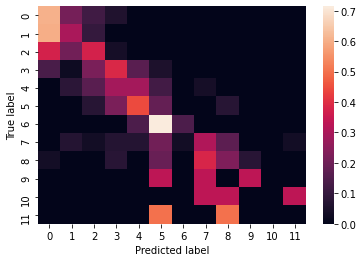

In [70]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, preds5)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Using SVMs

In [71]:
from sklearn import svm

In [72]:
svm_model = svm.SVC(kernel='rbf', C=1, gamma=1) 
svm_model.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [73]:
preds6 = svm_model.predict(X_test)

In [74]:
print("Train Accuracy:", svm_model.score(X_train, y_train))
print("Test Accuracy:" , svm_model.score(X_test, y_test))

Train Accuracy: 0.8697183098591549
Test Accuracy: 0.4385245901639344


In [75]:
from sklearn.metrics import classification_report
report = classification_report(digits = 3, y_true = y_test, y_pred = preds6)
print(report)

              precision    recall  f1-score   support

           1      0.408     0.879     0.558        33
           2      0.500     0.267     0.348        30
           3      0.467     0.292     0.359        24
           5      0.579     0.611     0.595        36
           6      0.273     0.250     0.261        24
           7      0.458     0.407     0.431        27
           8      0.000     0.000     0.000         7
           9      0.367     0.379     0.373        29
          10      0.464     0.500     0.481        26
          11      0.000     0.000     0.000         3
          12      0.000     0.000     0.000         3
          13      0.000     0.000     0.000         2

    accuracy                          0.439       244
   macro avg      0.293     0.299     0.284       244
weighted avg      0.419     0.439     0.410       244



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


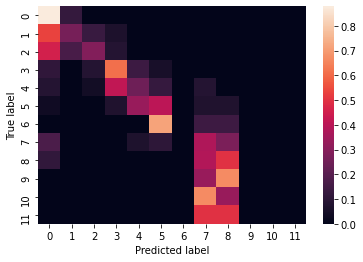

In [76]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, preds6)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Using Decision Tree

In [77]:
from sklearn import tree

In [78]:
dt_model = tree.DecisionTreeClassifier(criterion='gini')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [79]:
preds7 = dt_model.predict(X_test)

In [80]:
print("Train Accuracy:", dt_model.score(X_train, y_train))
print("Test Accuracy:" , dt_model.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.5286885245901639


In [81]:
from sklearn.metrics import classification_report
report = classification_report(digits = 3, y_true = y_test, y_pred = preds7)
print(report)

              precision    recall  f1-score   support

           1      0.634     0.788     0.703        33
           2      0.593     0.533     0.561        30
           3      0.435     0.417     0.426        24
           5      0.595     0.611     0.603        36
           6      0.455     0.625     0.526        24
           7      0.444     0.296     0.356        27
           8      0.333     0.143     0.200         7
           9      0.586     0.586     0.586        29
          10      0.500     0.500     0.500        26
          11      0.000     0.000     0.000         3
          12      1.000     0.333     0.500         3
          13      0.000     0.000     0.000         2

    accuracy                          0.529       244
   macro avg      0.465     0.403     0.413       244
weighted avg      0.528     0.529     0.521       244



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


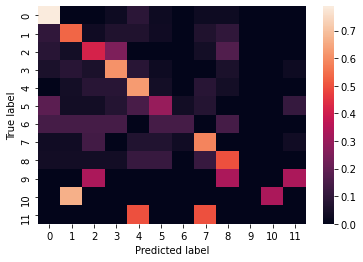

In [82]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, preds7)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Hyperparameter Tuning of Random Forest Classifier using RandomisedSearchCV

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
param_random = {

'bootstrap': [True],

'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],

'max_features': ['auto', 'sqrt'],

'min_samples_leaf': [1, 2, 4],

'min_samples_split': [2, 5, 10],

'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

}

In [85]:
param_random

{'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [86]:
rf = RandomForestClassifier()

In [87]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_random, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [88]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [89]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [90]:
predictions_random = rf_random.predict(X_test)

In [91]:
predictions_random

array([ 3,  5,  1,  6,  2,  5,  1,  2,  6,  6, 10,  6,  1,  2,  6,  1,  6,
        2,  7,  8,  9,  9, 13,  9,  2,  7,  1,  7,  2,  7,  1,  1,  7,  9,
        5,  1,  6,  9,  7,  1,  7,  5,  7,  1,  1,  9,  6,  2, 10, 10,  7,
        3,  6, 10,  5,  1, 10,  5,  1,  2,  5,  6,  3, 10, 10,  9,  2,  3,
        1,  1, 13,  3,  3,  5,  3,  5,  2, 11,  1, 10,  5,  5, 10,  1,  6,
        1, 10,  1,  1,  5,  2,  7,  9,  5,  9,  1,  1,  5,  1,  1,  5,  6,
        2,  1, 10,  3,  3,  2,  7,  2,  9,  1,  5,  3,  9, 10,  7,  1,  7,
        6,  9,  1, 13,  6,  3,  5,  1,  5, 10,  9,  7,  2,  1,  2,  1,  9,
        1, 10,  1, 10,  7,  6,  6, 10, 10,  1,  5, 10,  5, 10,  1,  5,  5,
        6,  3,  3,  2, 10,  1,  7,  9,  1,  1,  7,  3,  5,  5,  3,  1,  1,
        1,  5,  5,  5,  2,  9,  2,  1,  6, 10, 10,  3,  1,  9, 10, 10, 10,
        2,  2,  2,  1,  1, 10,  1,  6,  5,  1, 10,  2,  2,  9,  1,  1,  7,
        7,  5,  5,  1,  1,  7, 10,  9,  2,  2,  5,  7,  5,  7,  6,  1,  1,
        9,  3,  6,  9,  5

In [92]:
print("Train Accuracy:", rf_random.score(X_train, y_train))
print("Test Accuracy:" , rf_random.score(X_test, y_test))

Train Accuracy: 0.9665492957746479
Test Accuracy: 0.6311475409836066


In [93]:
from sklearn.metrics import classification_report
report = classification_report(digits = 3, y_true = y_test, y_pred = predictions_random)
print(report)

              precision    recall  f1-score   support

           1      0.579     1.000     0.733        33
           2      0.724     0.700     0.712        30
           3      0.722     0.542     0.619        24
           5      0.735     0.694     0.714        36
           6      0.609     0.583     0.596        24
           7      0.652     0.556     0.600        27
           8      1.000     0.143     0.250         7
           9      0.560     0.483     0.519        29
          10      0.567     0.654     0.607        26
          11      1.000     0.333     0.500         3
          12      0.000     0.000     0.000         3
          13      0.000     0.000     0.000         2

    accuracy                          0.631       244
   macro avg      0.596     0.474     0.487       244
weighted avg      0.647     0.631     0.618       244



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


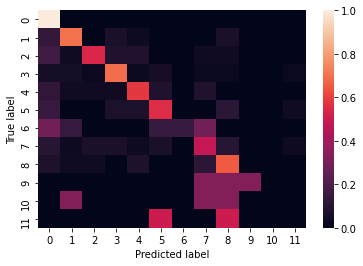

In [94]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions_random)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Hyperparameter Tuning of Random Forest Classifier using GridSearchCV

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {

    'n_estimators': [100, 300, 500, 800, 1200],
    'max_depth': [5, 8, 15, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10] 
}

In [97]:
param_grid

{'n_estimators': [100, 300, 500, 800, 1200],
 'max_depth': [5, 8, 15, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [98]:
rf = RandomForestClassifier()

In [99]:
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, 

                          cv = 5, n_jobs = -1, verbose = 2)

In [100]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100],
                         'n_estimators': [100, 300, 500, 800, 1200]},
             verbose=2)

In [101]:
rf_grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [102]:
predictions_grid = rf_grid.predict(X_test)

In [103]:
predictions_grid

array([ 3,  5,  1,  6,  2,  5,  1,  7,  6,  6, 10,  7,  1,  2,  6,  1,  6,
       13,  7,  8,  9,  7,  6,  9,  2,  7,  1,  7,  2,  7,  1,  6,  7,  9,
        5,  1,  7,  9,  7,  1,  7,  5,  7,  1,  1,  9,  6,  2, 10, 10,  7,
        3,  6, 10,  5,  1, 10,  5,  1,  2,  5,  6,  3, 10, 10,  9,  2,  3,
        1,  1,  6,  3,  3,  5,  9,  5,  2, 11,  1,  2,  5,  5,  2,  1,  6,
        1, 10,  1,  1,  5,  2,  7,  9,  5,  9,  1,  1,  5,  1,  1,  5,  6,
        2,  1, 10,  3,  3,  2,  7,  2,  9,  1,  5,  3,  9, 10,  7,  1,  7,
        5,  9,  1,  6,  6,  3,  6,  1,  5, 10,  9,  7,  2,  1,  2,  1,  9,
        1,  2,  1, 10,  5,  6,  6, 10,  9,  1,  5, 10,  5, 10,  1,  5,  6,
        6,  3,  3,  2, 10,  1,  7,  9,  1,  1,  7,  3,  5,  5,  3,  1,  1,
        1,  5,  2,  5,  2,  9,  2, 10,  6, 10, 10,  3,  1,  5, 10, 10, 10,
        2,  2,  2,  1,  1, 10,  1,  6,  5,  1, 10,  2,  2,  9,  1,  1,  7,
        7,  5,  5,  1,  1,  7, 10,  9,  7,  2,  5,  7,  5,  7,  6,  1,  1,
       12,  3,  6,  9,  5

In [104]:
print("Train Accuracy:", rf_grid.score(X_train, y_train))
print("Test Accuracy:" , rf_grid.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.6557377049180327


In [105]:
from sklearn.metrics import classification_report
report = classification_report(digits = 3, y_true = y_test, y_pred = predictions_grid)
print(report)

              precision    recall  f1-score   support

           1      0.600     1.000     0.750        33
           2      0.759     0.733     0.746        30
           3      0.765     0.542     0.634        24
           5      0.694     0.694     0.694        36
           6      0.560     0.583     0.571        24
           7      0.571     0.593     0.582        27
           8      1.000     0.143     0.250         7
           9      0.652     0.517     0.577        29
          10      0.704     0.731     0.717        26
          11      1.000     0.333     0.500         3
          12      1.000     0.333     0.500         3
          13      0.000     0.000     0.000         2

    accuracy                          0.656       244
   macro avg      0.692     0.517     0.543       244
weighted avg      0.676     0.656     0.643       244



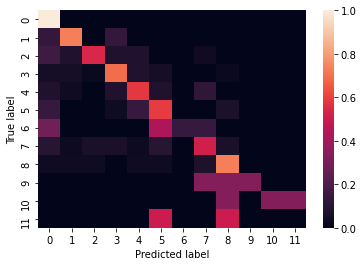

In [106]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predictions_grid)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [117]:
import pickle

file = open(r'C:\Users\KIIT\Documents\LGM-Soc contributions\IPL Winner Prediction\Model/grid_rf_model.pkl','wb')

In [118]:
pickle.dump(rf_grid, file)

## Saving the predictions of the the hypertuned Random Forest Classifier in CSV file

In [147]:
rf_grid_predictions = pd.DataFrame()
rf_grid_predictions['Predicted Winner'] = predictions_grid
rf_grid_predictions

,Predicted Winner
0,3
1,5
2,1
3,6
4,2
...,...
239,1
240,1
241,9
242,7


In [149]:
rf_grid_predictions['Predicted Winner(Encoded)']  = rf_grid_predictions['Predicted Winner'].apply(str)

In [150]:
rf_grid_predictions.replace(['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','Draw'],inplace=True)


rf_grid_predictions.head(5)

,Predicted Winner,Predicted Winner(Encoded)
0,3,RCB
1,5,CSK
2,1,MI
3,6,RR
4,2,KKR


In [151]:
rf_grid_predictions.to_csv(r'C:\Users\KIIT\Documents\LGM-Soc contributions\IPL Winner Prediction\Dataset/HT_grid Random Forest predictions.csv',header=True,index=False)

## Hyperparameter Tuning of XGBoost Classifier using GridSearchCV

In [109]:
from xgboost import XGBClassifier

In [110]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
    XGB = XGBClassifier()
    
    gridsearch = GridSearchCV(estimator = XGB,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gridsearch.fit(X_train,y_train)

    return gridsearch.best_params

In [111]:
XGB_grid = XGBClassifier(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        max_depth = 6,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.7)

XGB_grid.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

C:\Users\KIIT\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
predictions_xgb_grid = XGB_grid.predict(X_test)

In [113]:
predictions_xgb_grid

array([ 3,  5,  1,  6,  2,  5,  1,  2,  6,  6, 10,  6,  1,  2,  6,  1,  6,
        2,  7,  8,  9,  2,  5, 10,  2,  7,  1,  7,  2,  7,  1,  6,  7,  9,
        5,  1,  9,  3,  7,  1,  7,  5,  7,  8,  1,  9,  6,  2,  7, 10,  7,
        3,  6, 10,  5,  1, 10,  5,  1,  2,  5,  6,  3, 13, 10,  9,  2,  7,
        1, 10,  7,  3,  5,  3,  3,  5,  2, 11,  1,  2,  5,  5, 10,  1,  6,
        6,  9,  1,  1,  5,  2,  7,  9,  5,  9,  1,  1,  5,  1,  1,  5,  6,
        2,  1, 10,  3,  3,  2,  7,  9, 11,  1,  5,  3,  9, 10,  7,  1,  7,
        6, 11,  1, 13,  6,  3,  5,  1,  5, 10,  9,  7,  2,  1,  3,  1,  9,
        1, 10,  1, 10,  6,  6,  6, 10,  9,  1,  5,  2,  5, 10,  1,  7,  5,
        6,  3,  3,  2, 10,  3,  7,  9,  1,  1,  7,  3,  6,  5,  3,  6,  1,
        1,  5,  5,  5,  2,  9,  2, 10,  1, 10, 10,  3,  1,  9, 10, 10,  7,
        2,  2, 11,  1,  1,  3,  1,  6,  5,  8, 10,  2,  2,  9,  9,  1,  3,
        5,  5,  5,  1,  1,  7, 10,  9,  2,  2,  5,  7,  5,  9,  6,  9,  9,
       12,  3,  6,  9,  5

In [114]:
print("Train Accuracy:", XGB_grid.score(X_train, y_train))
print("Test Accuracy:" , XGB_grid.score(X_test, y_test))

Train Accuracy: 0.9964788732394366
Test Accuracy: 0.6639344262295082


In [115]:
from sklearn.metrics import classification_report
report = classification_report(digits = 3, y_true = y_test, y_pred = predictions_xgb_grid)
print(report)

              precision    recall  f1-score   support

           1      0.604     0.879     0.716        33
           2      0.679     0.633     0.655        30
           3      0.545     0.500     0.522        24
           5      0.765     0.722     0.743        36
           6      0.630     0.708     0.667        24
           7      0.708     0.630     0.667        27
           8      1.000     0.429     0.600         7
           9      0.667     0.621     0.643        29
          10      0.750     0.692     0.720        26
          11      0.500     0.667     0.571         3
          12      1.000     0.333     0.500         3
          13      0.000     0.000     0.000         2

    accuracy                          0.664       244
   macro avg      0.654     0.568     0.584       244
weighted avg      0.678     0.664     0.661       244



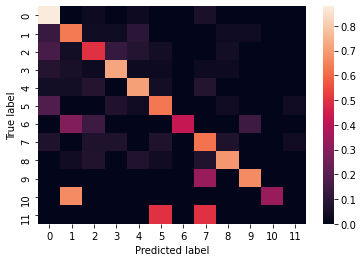

In [116]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,predictions_xgb_grid)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [121]:
import pickle

file = open(r'C:\Users\KIIT\Documents\LGM-Soc contributions\IPL Winner Prediction\Model/grid_xgb_model.pkl','wb')

In [122]:
pickle.dump(XGB_grid, file)

## Saving the predictions of the the hypertuned XGBoost Classifier in CSV file

In [143]:
xgb_predictions = pd.DataFrame()
xgb_predictions['Predicted Winner'] = predictions_xgb_grid
xgb_predictions

,Predicted Winner
0,3
1,5
2,1
3,6
4,2
...,...
239,1
240,1
241,9
242,7


In [144]:
xgb_predictions['Predicted Winner(Encoded)']  = xgb_predictions['Predicted Winner'].apply(str)

In [145]:
xgb_predictions.replace(['1','2','3','4','5','6','7','8','9','10','11','12','13','14']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','Draw'],inplace=True)


xgb_predictions.head(5)

,Predicted Winner,Predicted Winner(Encoded)
0,3,RCB
1,5,CSK
2,1,MI
3,6,RR
4,2,KKR


In [146]:
xgb_predictions.to_csv(r'C:\Users\KIIT\Documents\LGM-Soc contributions\IPL Winner Prediction\Dataset/HT_XGBoost predictions.csv',header=True,index=False)

### Visualization of the predicted winners

Text(0.5, 1.0, 'Prediction of the IPL match winner')

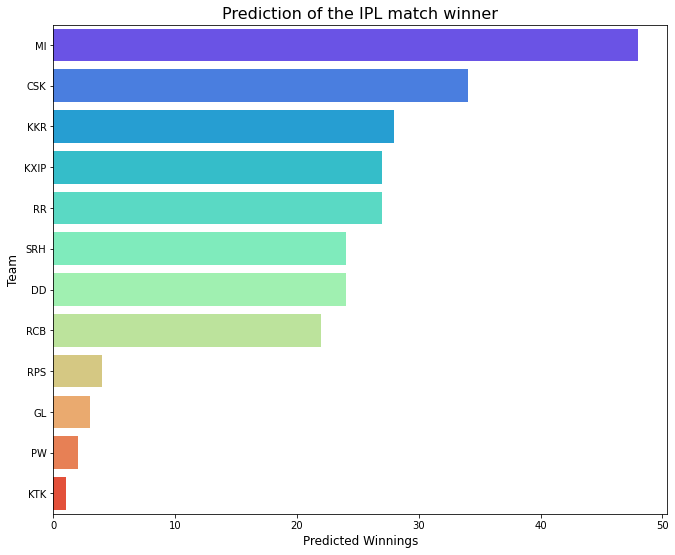

In [154]:
plt.figure(figsize = (11,9))
sns.countplot(y = 'Predicted Winner(Encoded)',
              data = xgb_predictions,
              order= xgb_predictions['Predicted Winner(Encoded)'].value_counts().index,
              palette = 'rainbow' )
plt.xlabel('Predicted Winnings',fontsize=12)
plt.ylabel('Team',fontsize=12)
plt.title('Prediction of the IPL match winner',fontsize=16)